<a id = 'table_of_content'></a>
0. [Import_libraries](#imports)
1. [Import_Data](#import_data)
2. [Data_exploration](#Data_exploration)
3. [Data_cleaning](#Data_cleaning)
4. [Data_preparation](#Data_preparation)
5. [Benchmark_modeling](#Benchmark_modeling)
6. [Feature_engineering](#Feature_engineering)
7. [](#)
8. [](#)

# 0. Import_Libraries <a id= 'imports'></a>
[Back_to_top](#imports)

In [5]:
import pandas as pd
import numpy as np

%matplotlib inline 
# to see the plots in notebooks

# 1. Import_Data <a id= 'import_data'></a>
[Back_to_top](#imports)

In [6]:
# taxi_df = pd.read_parquet("data\yellow_tripdata_2023-01.parquet")
taxi_jan_2023 = pd.read_parquet("data\yellow_tripdata_2023-01.parquet")
taxi_data = pd.concat([taxi_jan_2023])

In [7]:
#yellow_tripdata_2023-01.parquet
#taxi_df.head()
print(taxi_data.shape)
taxi_data.head()

(3066766, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [9]:
taxi_data.shape

(3066766, 19)

# 2. Data_exploration <a id= 'Data_exploration'></a>
[Back_to_top](#imports)

In [10]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [19]:
taxi_data = taxi_data[[ 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'total_amount']]

In [20]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,161,141,2,14.30
1,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,43,237,1,16.90
2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,48,238,1,34.90
3,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,138,7,1,20.85
4,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,107,79,1,19.68


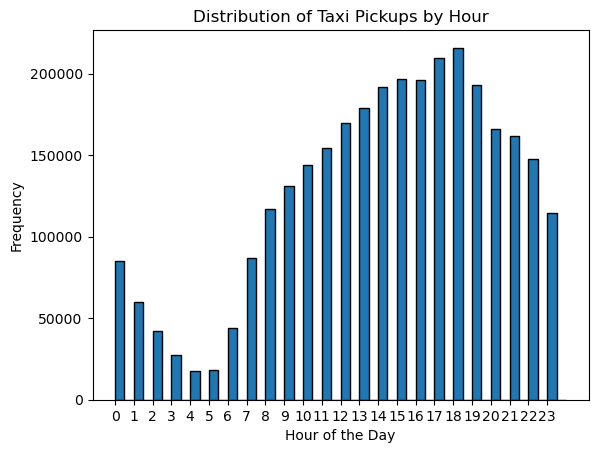

In [40]:
import matplotlib.pyplot as plt
# taxi_data.tpep_pickup_datetime.hist(figsize = (20,10), bins = 5)
taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'])

# Extract the hour component from the datetime column
pickup_hours = taxi_data['tpep_pickup_datetime'].dt.hour

# Plot the histogram of pickup hours
plt.hist(pickup_hours, bins=48, range=(0, 24), edgecolor='black')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Distribution of Taxi Pickups by Hour')
plt.xticks(range(0, 24))
plt.show()

(array([     0.,      0.,  76762.,      0.,  65777.,      0.,  85783.,
             0.,  95092.,      0., 101063.,      0., 102550.,      0.,
        105036.,      0.,  85056.,      0.,  85349.,      0.,  99916.,
             0., 106118.,      0., 111386.,      0., 110719.,      0.,
        112950.,      0.,  96844.,      0.,  80120.,      0., 101052.,
             0., 106152.,      0., 114603.,      0., 109444.,      0.,
        111999.,      0.,  89651.,      0.,  89791.,      0., 103862.,
             0., 109203.,      0., 114877.,      0., 111668.,      0.,
        111645.,      0.,  88131.,  83768.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
        16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
        22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
        27.5, 28

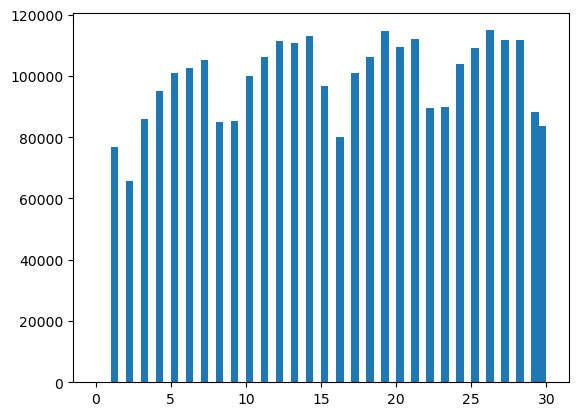

In [41]:
# taxi_data.head() #tpep_pickup_datetime

taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'])
pickup_hours = taxi_data['tpep_pickup_datetime'].dt.day
plt.hist(pickup_hours, bins = 60, range = (0,30) )


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

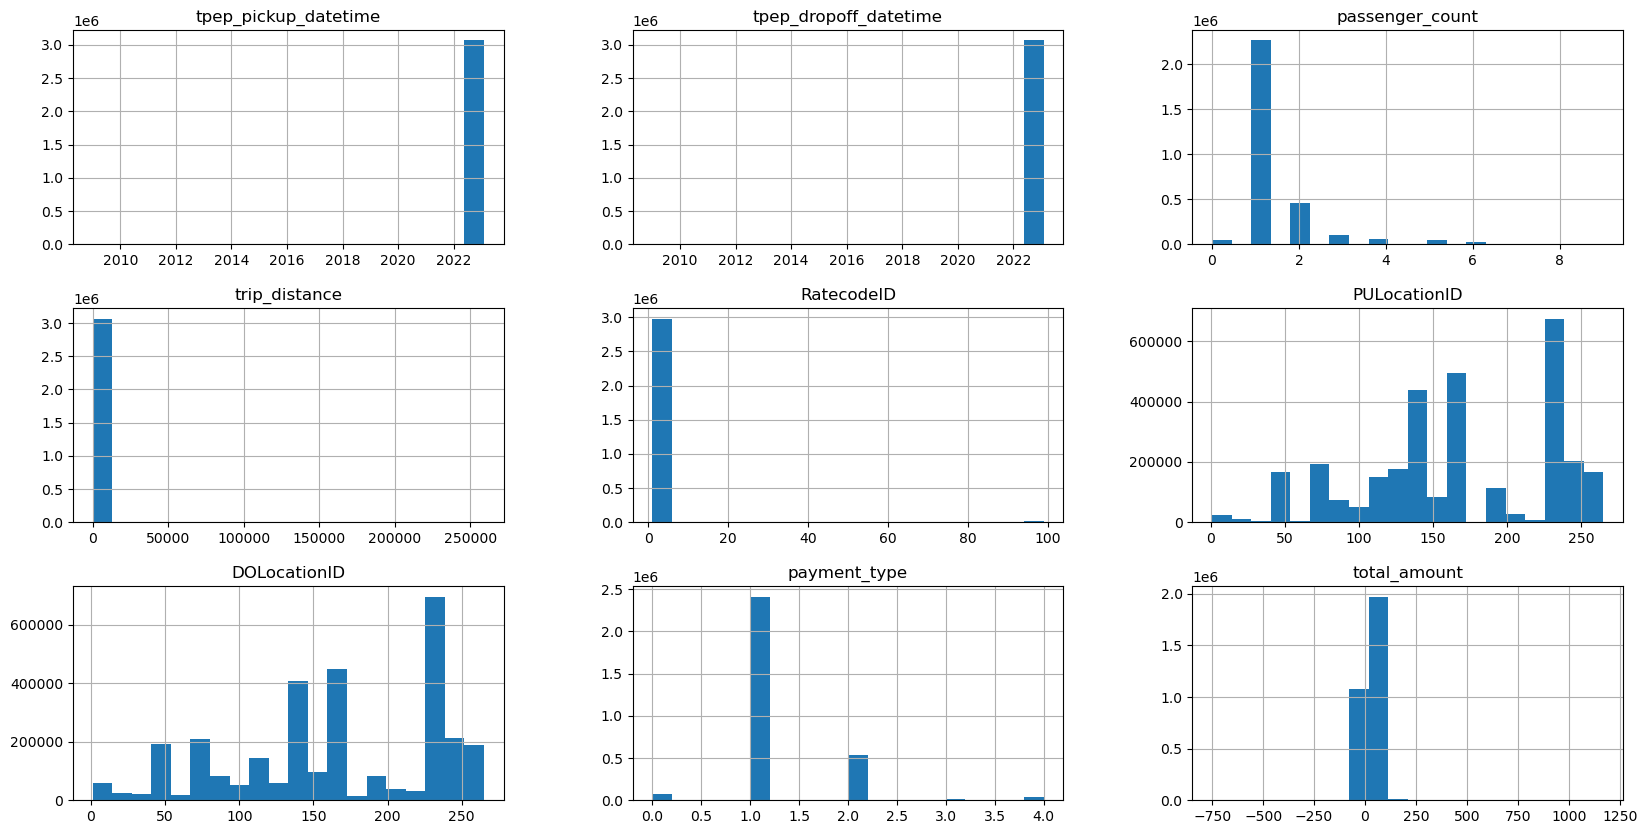

In [42]:
taxi_data.hist(figsize = (20,10), bins = 20)

# 3. Data_cleaning <a id= 'Data_cleaning'></a>
[Back_to_top](#imports)

# 4. Data_preparation <a id= 'Data_preparation'></a>
[Back_to_top](#imports)

# 5. Benchmark_modeling <a id= 'Benchmark_modeling'></a>
[Back_to_top](#imports)

# 6. Feature_engineering <a id='Feature_engineering'></a>
[Back_to_top](#imports)